In [ ]:
import pandas as pd


In [ ]:
df=pd.DataFrame(pd.read_csv('advertising.csv'))
print(df)

        TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3   12.0
3    151.5   41.3       58.5   16.5
4    180.8   10.8       58.4   17.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4

[200 rows x 4 columns]


In [ ]:
print(df.isnull().sum())

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


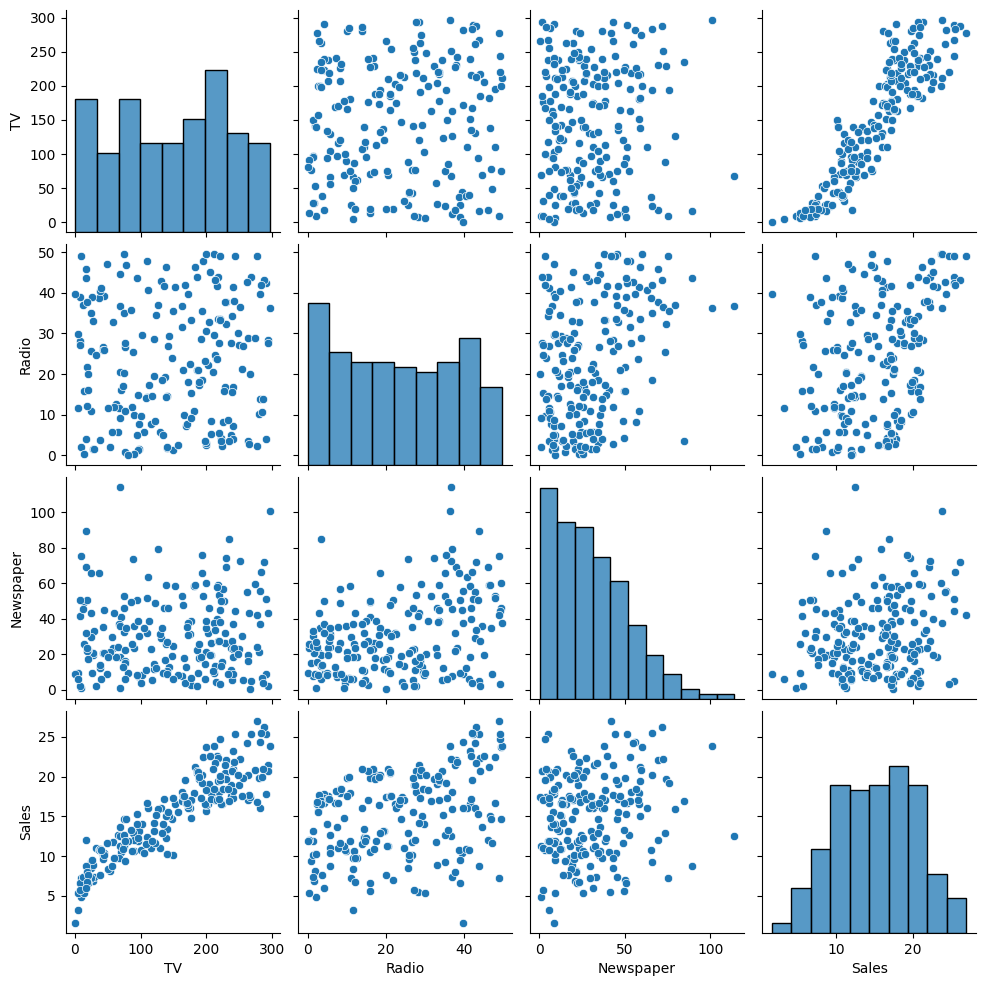

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df[['TV', 'Radio', 'Newspaper','Sales']])
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(df,test_size=0.2)

In [ ]:
model=LinearRegression()

In [ ]:
X_train = train[['TV', 'Radio', 'Newspaper']]
y_train = train['Sales']

linear_Regression.fit(X_train, y_train)
y_pred_linear = linear_Regression.predict(X_train)

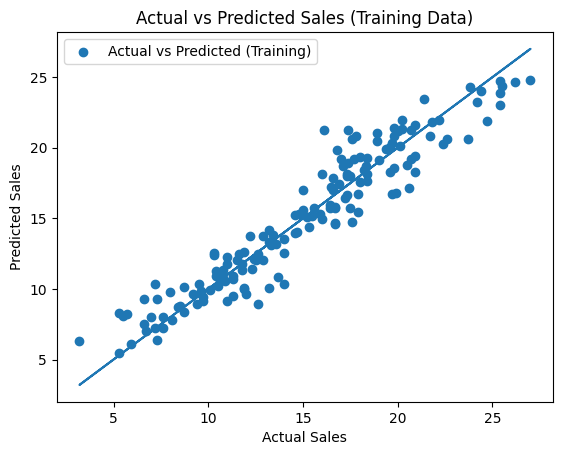

Mean Absolute Error (MAE): 1.1920750440727772
Mean Squared Error (MSE): 3.3414433264413246
Root Mean Squared Error (RMSE): 1.8279615221446333


In [ ]:
plt.scatter(y_train, y_pred_train, label="Actual vs Predicted (Training)")
plt.plot(y_train, y_train)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales (Training Data)")
plt.legend()
plt.show()

from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

polynomial_features = PolynomialFeatures(degree=2)
linear_regression = LinearRegression()
model = Pipeline([('polynomial_features', polynomial_features),
                  ('linear_regression', linear_regression)])

In [ ]:
X_test = test[['TV', 'Radio', 'Newspaper']]
y_test = test['Sales']

In [ ]:
model.fit(X_train, y_train)

Pipeline(steps=[('polynomial_features', PolynomialFeatures()),
                ('linear_regression', LinearRegression())])

In [ ]:
y_pred_poly = model.predict(X_test)

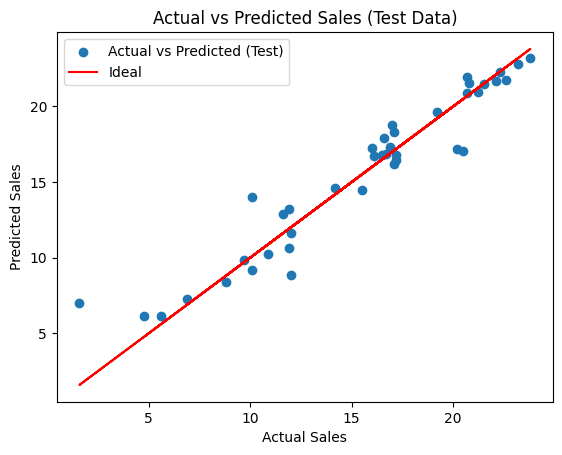

Mean Absolute Error (MAE): 1.0853585885538561
Mean Squared Error (MSE): 2.492284542944635
Root Mean Squared Error (RMSE): 1.578697102975943


In [ ]:
plt.scatter(y_test, y_pred_poly, label="Actual vs Predicted (Test)")
plt.plot(y_test, y_test, color='red', label="Ideal")
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales (Test Data)")
plt.legend()
plt.show()

from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
mae = mean_absolute_error(y_test, y_pred_poly)
mse = mean_squared_error(y_test, y_pred_poly)
rmse = np.sqrt(mse)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

In [ ]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

X_train = train.drop('Sales', axis=1)
y_train = train['Sales']

X_test = test.drop('Sales', axis=1)
y_test = test['Sales']
sc_X = StandardScaler()
sc_y = StandardScaler()

X_train_scaled = sc_X.fit_transform(X_train)
X_test_scaled = sc_X.transform(X_test)

y_train_scaled = sc_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()

svr = SVR(kernel='rbf')
svr.fit(X_train_scaled, y_train_scaled)

y_pred_svr = svr.predict(X_test_scaled)
y_pred = sc_y.inverse_transform(y_pred_svr.reshape(-1, 1)).ravel()

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Predictions:", y_pred)


Mean Squared Error: 3.3414433264413246
Predictions: [20.77841276 14.34736432  9.15602764 10.41936042 17.18366662 20.67153979
 18.40945406 16.74101186 16.65071373 17.14042559  8.68730088 17.03693778
 14.24580199 21.62739907 18.04955062  8.92209655  7.72715045  8.4892915
 22.35583056 11.4975888  10.67714713 23.31110485  7.23957639 17.58426583
 17.67852985 16.90969016 17.46840254 17.41108472 16.01882288 19.88074765
 21.71842219 13.60082289  9.17661993 22.60605328 13.14536742  9.40626858
 13.89258278 20.4114871  21.1358923  19.11460864]


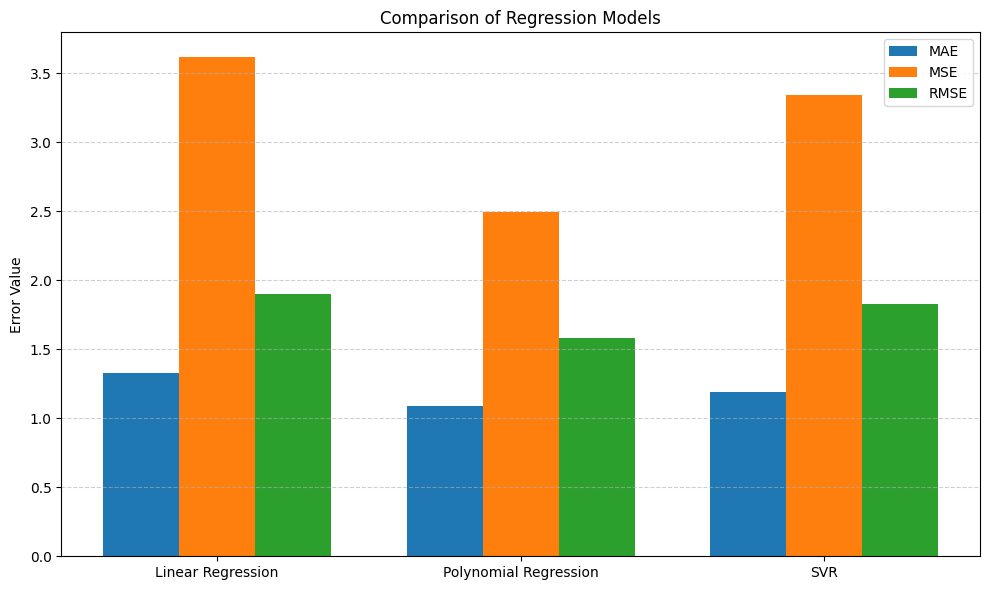

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_pred_linear_test = linear_Regression.predict(X_test)
y_pred_poly_test = model.predict(X_test)

models = ['Linear Regression', 'Polynomial Regression', 'SVR']
predictions = {
    'Linear Regression': y_pred_linear_test,
    'Polynomial Regression': y_pred_poly_test,
    'SVR': y_pred
}
mae_list = []
mse_list = []
rmse_list = []
for model_name in models:
    pred = predictions[model_name]
    mae_list.append(mean_absolute_error(y_test, pred))
    mse_list.append(mean_squared_error(y_test, pred))
    rmse_list.append(np.sqrt(mean_squared_error(y_test, pred)))

x = np.arange(len(models))
width = 0.25

plt.figure(figsize=(10, 6))
plt.bar(x - width, mae_list, width, label='MAE')
plt.bar(x, mse_list, width, label='MSE')
plt.bar(x + width, rmse_list, width, label='RMSE')

plt.xticks(x, models)
plt.ylabel('Error Value')
plt.title('Comparison of Regression Models')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [71]:
from sklearn.cluster import KMeans

X = df.drop('Sales', axis=1)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
df['cluster'] = kmeans.labels_
print(df.head())

      TV  Radio  Newspaper  Sales  cluster
0  230.1   37.8       69.2   22.1        0
1   44.5   39.3       45.1   10.4        1
2   17.2   45.9       69.3   12.0        1
3  151.5   41.3       58.5   16.5        2
4  180.8   10.8       58.4   17.9        2


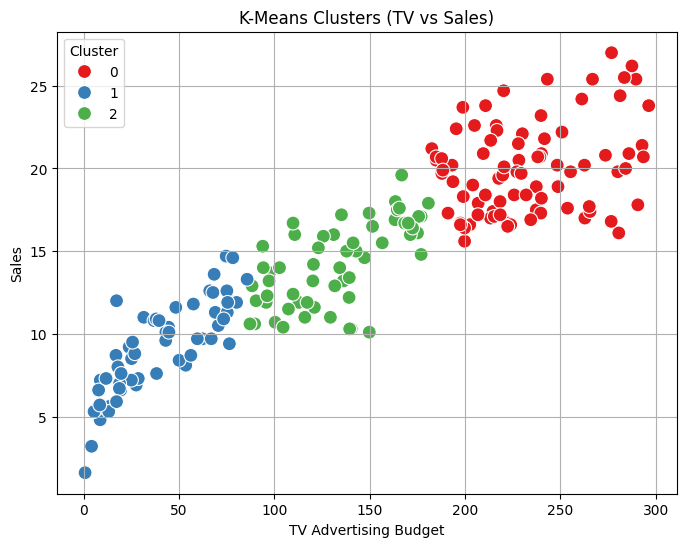

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='TV', y='Sales', hue='cluster', palette='Set1', s=100)

plt.title('K-Means Clusters (TV vs Sales)')
plt.xlabel('TV Advertising Budget')
plt.ylabel('Sales')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()
